This notebook provides the code to count the number of papers similar to the PPP paper or control, a different time (before/same year/after patent application/publication/grant). 

In [1]:
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool
from functools import partial
import numpy as np
from collections import Counter
import time 

## import database username and password
f = open( "/home/fs01/spec1142/Emma/PPPs/" + "database.txt", "r")
user , password = f.read().split()

main_path = '/home/fs01/spec1142/Emma/PPPs/PPP_analysis/'

## Count similar papers by year

In [ ]:
run PPP_analysis/count_similar_papers.py

## Count similar papers before/after app/pub/grant

In [2]:
## load counts of similar papers ( 5 years before publication - 10 years after publication ) 

file = pd.read_csv(main_path + 'counts_similar_papers.tsv' , sep = "\t", index_col = 0) 
file = file.drop_duplicates()
file= file.reset_index()
file = file[['paper_id', 'count_after_1_0.6',
       'count_after_1_0.64', 'count_after_1_0.68', 'count_after_2_0.6',
       'count_after_2_0.64', 'count_after_2_0.68', 'count_after_3_0.6',
       'count_after_3_0.64', 'count_after_3_0.68', 'count_after_4_0.6',
       'count_after_4_0.64', 'count_after_4_0.68', 'count_after_5_0.6',
       'count_after_5_0.64', 'count_after_5_0.68', 'count_after_6_0.6',
       'count_after_6_0.64', 'count_after_6_0.68', 'count_after_7_0.6',
       'count_after_7_0.64', 'count_after_7_0.68', 'count_after_8_0.6',
       'count_after_8_0.64', 'count_after_8_0.68', 'count_after_9_0.6',
       'count_after_9_0.64', 'count_after_9_0.68', 'count_after_10_0.6',
       'count_after_10_0.64', 'count_after_10_0.68', 'count_before_5_0.6',
       'count_before_5_0.64', 'count_before_5_0.68', 'count_before_4_0.6',
       'count_before_4_0.64', 'count_before_4_0.68', 'count_before_3_0.6',
       'count_before_3_0.64', 'count_before_3_0.68', 'count_before_2_0.6',
       'count_before_2_0.64', 'count_before_2_0.68', 'count_before_1_0.6',
       'count_before_1_0.64', 'count_before_1_0.68', 'count_before_0_0.6',
       'count_before_0_0.64', 'count_before_0_0.68']].drop_duplicates()

file['paper_id'] = ['W' + str(elem) for elem in file['paper_id'] ]

In [3]:
## load twin file 

controls = pd.read_csv(main_path + "loose_twins_cites_1patent.tsv", sep = "\t")
controls = controls[controls['paper_id'].notnull()][['paper_id', 'pair_id', 'patent_id', 'PPP', 'PPP_score',
       'application_date', 'publication_date', 'grant_date', 'paper_date']].sort_values(['paper_id','application_date']).drop_duplicates('paper_id')

In [4]:
## merge counts and twin file 

file= file.merge(controls, on='paper_id', how = 'left')
dic_file = file.to_dict('index')

In [5]:
## count the number of similar papers the years before / same / after the patent app / pub / grant

from datetime import datetime

for elem in tqdm(dic_file):
        

    dic_file[elem]['paper_id'] = "W" + str(dic_file[elem]['paper_id'])
    
    paper_pub = dic_file[elem]['paper_date']
    paper_pub = datetime.strptime(paper_pub, '%Y-%m-%d').year
    grant_year = dic_file[elem]['grant_date']
    grant_year= datetime.strptime(grant_year, '%Y-%m-%d').year
    patent_app = dic_file[elem]['application_date']
    patent_app= datetime.strptime(patent_app, '%Y-%m-%d').year
    patent_pub = dic_file[elem]['publication_date']
    if pd.isna(patent_pub) == False: 
        patent_pub= datetime.strptime(patent_pub, '%Y-%m-%d').year
 
    
    if pd.isna(patent_pub) == False:
 
        for threshold in [ 0.6,0.64,0.68 ] :
 
            
 
            dic_file[elem]['count_before_app' + str(threshold)] = 0 
            dic_file[elem]['count_same_app' + str(threshold)] = 0 
            dic_file[elem]['count_after_app' + str(threshold)] = 0 
  
            
            dic_file[elem]['count_before_grant' + str(threshold)] = 0 
            dic_file[elem]['count_same_grant' + str(threshold)] = 0 
            dic_file[elem]['count_aft_grant' + str(threshold)] = 0 
 
            dic_file[elem]['count_before_pub' + str(threshold)] = 0
            dic_file[elem]['count_same_pub' + str(threshold)]  = 0
            dic_file[elem]['count_after_pub' + str(threshold)]= 0

            dic_file[elem]['count_before_paper' + str(threshold)] = 0
            dic_file[elem]['count_same_paper' + str(threshold)]  = 0
            dic_file[elem]['count_aft_paper' + str(threshold)]= 0
 
 
                
            
            for k in range(1,min(11, 2023 - paper_pub-1)):
                column = 'count_after_' + str(k) + '_' + str(threshold)
                year = paper_pub + k 
 
                if pd.isna(dic_file[elem][column]) == True:
                    dic_file[elem][column] = 0 
 
                if year < patent_pub:
                    dic_file[elem]['count_before_pub' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_pub:
                    dic_file[elem]['count_same_pub' + str(threshold)] += dic_file[elem][column]
                elif year > patent_pub:
                    dic_file[elem]['count_after_pub' + str(threshold)] += dic_file[elem][column]
                
                if year < grant_year:
                    dic_file[elem]['count_before_grant' + str(threshold)] +=  dic_file[elem][column]
                elif year == grant_year:
                    dic_file[elem]['count_same_grant' + str(threshold)] += dic_file[elem][column]
                elif year > grant_year:
                    dic_file[elem]['count_aft_grant' + str(threshold)] += dic_file[elem][column]
 
                if year < patent_app:
                    dic_file[elem]['count_before_app' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_app:
                    dic_file[elem]['count_same_app' + str(threshold)] += dic_file[elem][column]
                elif year > patent_app:
                    dic_file[elem]['count_after_app' + str(threshold)] += dic_file[elem][column]

                if year < paper_pub:
                    dic_file[elem]['count_before_paper' + str(threshold)] +=  dic_file[elem][column]
                elif year == paper_pub:
                    dic_file[elem]['count_same_paper' + str(threshold)] += dic_file[elem][column]
                elif year > paper_pub:
                    dic_file[elem]['count_aft_paper' + str(threshold)] += dic_file[elem][column]
 
 
            
            for k in range(6):
                column = 'count_before_' + str(k) + '_' + str(threshold)
                year = paper_pub - k 
 
                if pd.isna(dic_file[elem][column]) == True:
                    dic_file[elem][column] = 0 
 
                if year < patent_pub:
                    dic_file[elem]['count_before_pub' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_pub:
                    dic_file[elem]['count_same_pub' + str(threshold)] += dic_file[elem][column]
                elif year > patent_pub:
                    dic_file[elem]['count_after_pub' + str(threshold)] += dic_file[elem][column]
                
                if year < grant_year:
                    dic_file[elem]['count_before_grant' + str(threshold)] +=  dic_file[elem][column]
                elif year == grant_year:
                    dic_file[elem]['count_same_grant' + str(threshold)] += dic_file[elem][column]
                elif year > grant_year:
                    dic_file[elem]['count_aft_grant' + str(threshold)] += dic_file[elem][column]
 
                if year < patent_app:
                    dic_file[elem]['count_before_app' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_app:
                    dic_file[elem]['count_same_app' + str(threshold)] += dic_file[elem][column]
                elif year > patent_app:
                    dic_file[elem]['count_after_app' + str(threshold)] += dic_file[elem][column]

                if year < paper_pub:
                    dic_file[elem]['count_before_paper' + str(threshold)] +=  dic_file[elem][column]
                elif year == paper_pub:
                    dic_file[elem]['count_same_paper' + str(threshold)] += dic_file[elem][column]
                elif year > paper_pub:
                    dic_file[elem]['count_aft_paper' + str(threshold)] += dic_file[elem][column]
 
 
 
    else:
        
        for threshold in [ 0.6,0.64,0.68 ] :
 
            dic_file[elem]['count_before_pub' + str(threshold)] = None
            dic_file[elem]['count_same_pub' + str(threshold)]  = None
            dic_file[elem]['count_after_pub' + str(threshold)]= None
 
            dic_file[elem]['count_before_app' + str(threshold)] = 0
            dic_file[elem]['count_same_app' + str(threshold)]  = 0
            dic_file[elem]['count_after_app' + str(threshold)]= 0
 
            dic_file[elem]['count_before_grant' + str(threshold)] = 0 
            dic_file[elem]['count_same_grant' + str(threshold)] = 0 
            dic_file[elem]['count_aft_grant' + str(threshold)] = 0 

            dic_file[elem]['count_before_paper' + str(threshold)] = 0
            dic_file[elem]['count_same_paper' + str(threshold)]  = 0
            dic_file[elem]['count_aft_paper' + str(threshold)]= 0
 
            
            for k in range(1,min(11, 2023 - paper_pub-1)):
                column = 'count_after_' + str(k) + '_' + str(threshold)
                year = paper_pub + k 
 
                if pd.isna(dic_file[elem][column]) == True:
                    dic_file[elem][column] = 0 
                
                if year < grant_year:
                    dic_file[elem]['count_before_grant' + str(threshold)] +=  dic_file[elem][column]
                elif year == grant_year:
                    dic_file[elem]['count_same_grant' + str(threshold)] += dic_file[elem][column]
                elif year > grant_year:
                    dic_file[elem]['count_aft_grant' + str(threshold)] += dic_file[elem][column]
 
                if year < patent_app:
                    dic_file[elem]['count_before_app' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_app:
                    dic_file[elem]['count_same_app' + str(threshold)] += dic_file[elem][column]
                elif year > patent_app:
                    dic_file[elem]['count_after_app' + str(threshold)] += dic_file[elem][column]

                if year < paper_pub:
                    dic_file[elem]['count_before_paper' + str(threshold)] +=  dic_file[elem][column]
                elif year == paper_pub:
                    dic_file[elem]['count_same_paper' + str(threshold)] += dic_file[elem][column]
                elif year > paper_pub:
                    dic_file[elem]['count_aft_paper' + str(threshold)] += dic_file[elem][column]
 
 
            for k in range(6):
                column = 'count_before_' + str(k) + '_' + str(threshold)
                year = paper_pub - k 
 
                if pd.isna(dic_file[elem][column]) == True:
                    dic_file[elem][column] = 0 
                
                if year < grant_year:
                    dic_file[elem]['count_before_grant' + str(threshold)] +=  dic_file[elem][column]
                elif year == grant_year:
                    dic_file[elem]['count_same_grant' + str(threshold)] += dic_file[elem][column]
                elif year > grant_year:
                    dic_file[elem]['count_aft_grant' + str(threshold)] += dic_file[elem][column]
 
                if year < patent_app:
                    dic_file[elem]['count_before_app' + str(threshold)] +=  dic_file[elem][column]
                elif year == patent_app:
                    dic_file[elem]['count_same_app' + str(threshold)] += dic_file[elem][column]
                elif year > patent_app:
                    dic_file[elem]['count_after_app' + str(threshold)] += dic_file[elem][column]

                if year < paper_pub:
                    dic_file[elem]['count_before_paper' + str(threshold)] +=  dic_file[elem][column]
                elif year == paper_pub:
                    dic_file[elem]['count_same_paper' + str(threshold)] += dic_file[elem][column]
                elif year > paper_pub:
                    dic_file[elem]['count_aft_paper' + str(threshold)] += dic_file[elem][column]
 
 
        


100%|█████████████████████████████████| 510568/510568 [01:53<00:00, 4482.94it/s]


In [6]:
## tranform file into a flat file 

file = pd.DataFrame(dic_file).T
file = file[['paper_id', 'pair_id', 'patent_id', 'PPP', 'PPP_score',
       'application_date', 'publication_date', 'grant_date', 'paper_date',
             
       'count_before_pub0.6', 'count_same_pub0.6', 'count_after_pub0.6',
       'count_before_app0.6', 'count_same_app0.6', 'count_after_app0.6',
       'count_before_grant0.6', 'count_same_grant0.6', 'count_aft_grant0.6',
        'count_before_paper0.6', 'count_same_paper0.6', 'count_aft_paper0.6',
             
       'count_before_pub0.64', 'count_same_pub0.64', 'count_after_pub0.64',
       'count_before_app0.64', 'count_same_app0.64', 'count_after_app0.64',
       'count_before_grant0.64', 'count_same_grant0.64', 'count_aft_grant0.64',
        'count_before_paper0.64', 'count_same_paper0.64', 'count_aft_paper0.64',

             
       'count_before_pub0.68', 'count_same_pub0.68', 'count_after_pub0.68',
       'count_before_app0.68', 'count_same_app0.68', 'count_after_app0.68',
       'count_before_grant0.68', 'count_same_grant0.68','count_aft_grant0.68',
       'count_before_paper0.68', 'count_same_paper0.68','count_aft_paper0.68']]

file['paper_id'] = [ elem.replace('W','') for elem in file['paper_id']]
file['paper_id'] = [ "W" + elem for elem in file['paper_id'] ]

In [7]:
file

,paper_id,pair_id,patent_id,PPP,PPP_score,application_date,publication_date,grant_date,paper_date,count_before_pub0.6,...,count_after_pub0.68,count_before_app0.68,count_same_app0.68,count_after_app0.68,count_before_grant0.68,count_same_grant0.68,count_aft_grant0.68,count_before_paper0.68,count_same_paper0.68,count_aft_paper0.68
0,W2042032560,9744,US-4183931,1,2,1977-09-08,NaN,1980-01-15,1980-05-01,None,...,None,826.0,406.0,4024.0,1977.0,405.0,2874.0,1977.0,405.0,2874.0
1,W2072506663,10320,US-4215066,1,2,1978-11-13,NaN,1980-07-29,1980-08-01,None,...,None,6.0,0.0,16.0,6.0,2.0,14.0,6.0,2.0,14.0
2,W2103453760,14113,US-4235883,1,2,1978-10-12,NaN,1980-11-25,1980-01-01,None,...,None,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,W2153193600,35808,US-3992522,1,3,1975-06-18,NaN,1976-11-16,1980-05-01,None,...,None,0,3.0,79.0,3.0,6.0,73.0,32.0,7.0,43.0
4,W2952240920,38640,US-3991201,1,3,1975-05-19,NaN,1976-11-09,1980-04-29,None,...,None,0,0.0,46.0,0.0,0.0,46.0,5.0,5.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510563,W3092163277,382415,US-11430144,0,3,2017-09-26,2020-12-31,2022-08-30,2020-12-01,136.0,...,0.0,6.0,0.0,1.0,7.0,0,0,6.0,1.0,0.0
510564,W3107395609,383279,US-11041759,0,1,2019-06-28,2020-01-02,2021-06-22,2020-01-01,4087.0,...,308.0,1020.0,265.0,574.0,1551.0,308.0,0,1285.0,266.0,308.0
510565,W2995985099,385295,US-10557849,0,4,2015-03-31,2017-06-29,2020-02-11,2020-06-01,572.0,...,165.0,0,24.0,223.0,152.0,54.0,41.0,152.0,54.0,41.0
510566,W3007750780,387023,US-10983062,0,1,2016-09-02,2018-09-27,2021-04-20,2020-04-01,524.0,...,195.0,43.0,51.0,300.0,319.0,75.0,0,243.0,76.0,75.0


In [8]:
## save file 

file.to_csv(main_path + 'similar_papers_1980_2020_1patent.tsv', sep = "\t" , index = False)

## Plots - Threshold 

In [77]:
## tranform string into vector
def clean_encoding(encoded_text):
    if encoded_text == None:
        return None
    else:
        if "\n" in encoded_text:
            encoded_text = encoded_text.replace("\n" , "")
        encoded_text = encoded_text[1:-1]
        encoded_text = list(map(float , encoded_text.split()))
        return encoded_text

In [78]:
path = "/home/fs01/spec1142/Emma/test/Website/"

def load_array(year ):
    
    array_abstract = np.load(path + 'data/paper_abstract_array/abstracts' + str(year) + '.npy')
    array_patents = np.load(path + 'data/paper_abstract_array/papers' + str(year) + '.npy')

    return array_abstract, array_patents

In [79]:
def get_abstract(year,workers, i):

    list_abstract = []
    list_papers = []
    
    papers_year = list(file[file['paperpubyear'] == year]['paper_id'])   
    list_index = [ k for k in range(i,len(papers_year),workers) ] 
    
    
    conn = psycopg2.connect("user=" + user + " password=" + password) 
    cursor = conn.cursor()
    
    for k in list_index:
        work_id = "W" + str(papers_year[k])
        
            
        text = """select  work_id , encoded_abstract
                  from encoded_works_OpenAlex 
                  where work_id = '""" + work_id + """'
                    ;"""
        cursor.execute(text)
        res = cursor.fetchall()
        if len(res) > 0:
            list_papers.append(res[0][0])
            list_abstract.append(clean_encoding(res[0][1]))
    
    cursor.close()

    return list_papers , list_abstract
    

In [80]:
def count_similarity( list_abstracts , list_papers, threshold1 , threshold2,threshold3 , year):
    
    k=0    
    array_abstract, array_patents = load_array(year)
    size = len(array_abstract)
    print(size)

    array_return1 = np.zeros((len(list_abstracts)))
    array_return2 = np.zeros((len(list_abstracts)))
    array_return3 = np.zeros((len(list_abstracts)))

    for k in range(1+size//100000):
        knowlegde = np.transpose(array_abstract[100000*k:100000*(k+1),:])
        count1 , count2, count3 = matrix_multiplication(list_abstracts, knowlegde, threshold1 , threshold2,threshold3 )
        array_return1 += count1
        array_return2 += count2
        array_return3 += count3
        
    print(year)
    return array_return1 , array_return2, array_return3
    

In [81]:
def matrix_multiplication(a,b,threshold1,threshold2,threshold3):
    a = np.array(a,dtype = np.float32)
    b = np.array(b,dtype = np.float32)
    similarity = a.dot(b)
    list_counts1 = np.sum(similarity > threshold1, axis=1)
    list_counts2 = np.sum(similarity > threshold2, axis=1)
    list_counts3 = np.sum(similarity > threshold3, axis=1)
    similarity=0
        
    return list_counts1 , list_counts2,list_counts3

In [19]:
conn = psycopg2.connect("user=" + user + " password=" + password) 
cursor = conn.cursor()
    
    
        
text = """select  work_id , encoded_abstract
              from encoded_works_OpenAlex 
              where work_id = '""" + 'W1535266' + """'
                ;"""
cursor.execute(text)
res = cursor.fetchall()

In [20]:
list_papers = [res[0][0]]
list_abstracts = [ clean_encoding(res[0][1])]
list_papers = np.array(list_papers)
list_abstracts = np.array(list_abstracts)    

In [21]:
array_abstract, array_patents = load_arrays(2005,2007)

In [22]:
similarity = array_abstract.dot(np.transpose(list_abstracts))

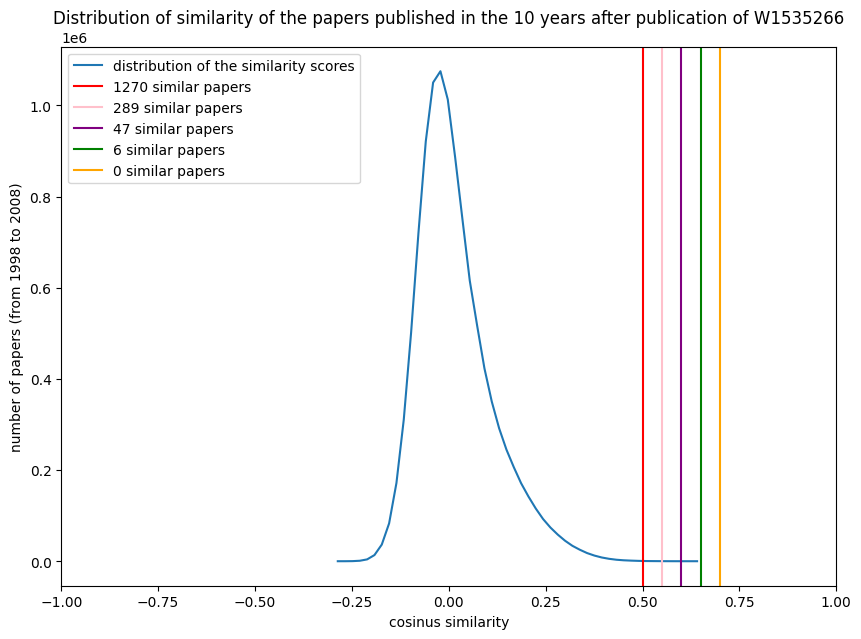

In [37]:
import matplotlib.pyplot as plt 
dist = np.histogram(similarity, bins = 50)
plt.figure(figsize=(10,7))
plt.plot(dist[1][:-1], dist[0], label = 'distribution of the similarity scores')
plt.axvline(x = 0.5, color = 'red', label = '1270 similar papers')
plt.axvline(x = 0.55, color = 'pink', label = '289 similar papers')
plt.axvline(x = 0.6, color = 'purple', label = '47 similar papers')
plt.axvline(x = 0.65, color = 'green', label = '6 similar papers')
plt.axvline(x = 0.7, color = 'orange', label = '0 similar papers')
plt.xlabel('cosinus similarity')
plt.ylabel('number of papers (from 1998 to 2008)')
plt.title('Distribution of similarity of the papers published in the 10 years after publication of W1535266')
plt.xlim([-1,1])
plt.legend()
plt.show()